In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import mplfinance as mplf
import numpy as np
import pandas as pd

import u

plt.rcParams["figure.figsize"] = (15, 5)

# Data Generation

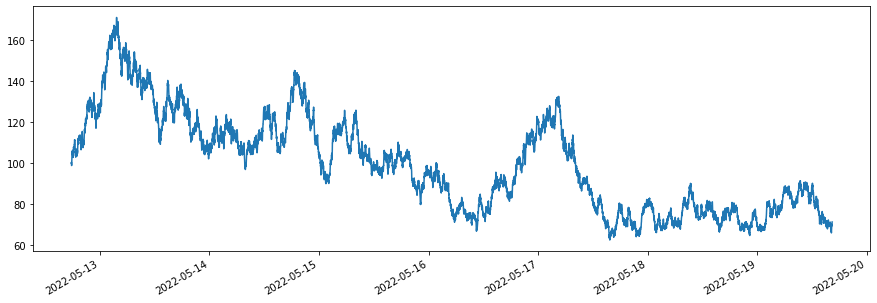

<AxesSubplot:>

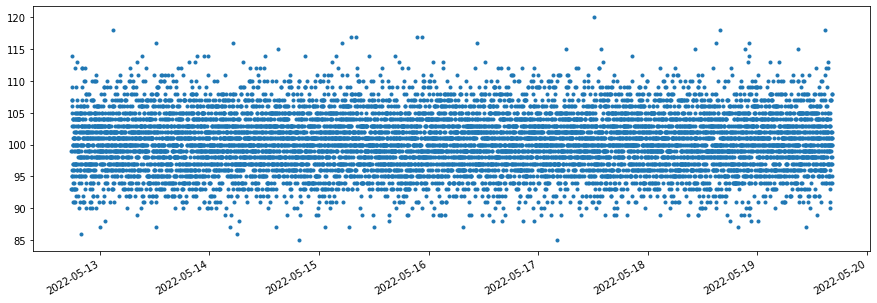

In [3]:
data = u.create_price_data(theta=0.0005, start_price=100, n_samples=10000)
data = u.add_volume_data(data, var=20)

data["close"].plot.line()
plt.show()
data["volume"].plot(style='.')

In [4]:
def create_bar_indices(data: pd.DataFrame, thres: float, name: str):
    indices = np.full(len(data.index), False, dtype=bool)
    csum = 0.
    for e, (_, r) in enumerate(data.iterrows()):
        if csum >= thres:
            csum = 0.
            indices[e] = True
        csum += r[name]
    return indices

def group_bars(data, indices):
    groups = data.reset_index().groupby(indices.cumsum())
    bars = groups[["volume"]].sum()
    return groups, bars

def get_bars(group):
    groups, bars = group
    bars.set_index(groups["index"].first(), inplace=True)
    return bars 

def with_dv(group):
    groups, bars = group
    bars["dv"] = groups["dv"].sum()
    return groups, bars

def with_open(group):
    groups, bars = group
    bars["open"] = groups["close"].first()
    return groups, bars
    
def with_low(group):
    groups, bars = group
    bars["low"] = groups["close"].min()
    return groups, bars 
    
def with_high(group):
    groups, bars = group
    bars["high"] = groups["close"].max()
    return groups, bars 
    
def with_close(group):
    groups, bars = group
    bars["close"] = groups["close"].last()
    return groups, bars

# Tick Bars

In [5]:
data["tmp"] = 1
tick_indices = create_bar_indices(data, 60, "tmp")
g = group_bars(data, tick_indices)
g = with_open(g)
g = with_close(g)
g = with_high(g)
g = with_low(g)
tick_bars = get_bars(g)
tick_bars.head()

,volume,open,close,high,low
index,,,,,
2022-05-12 17:44:59.573699,5970.0,100.00,102.89,111.40,98.79
2022-05-12 18:44:59.573699,6023.0,103.29,111.33,113.76,103.29
2022-05-12 19:44:59.573699,6037.0,111.88,114.65,116.95,106.50
2022-05-12 20:44:59.573699,6027.0,115.19,130.63,130.63,115.19
2022-05-12 21:44:59.573699,5951.0,130.62,130.43,134.44,122.32


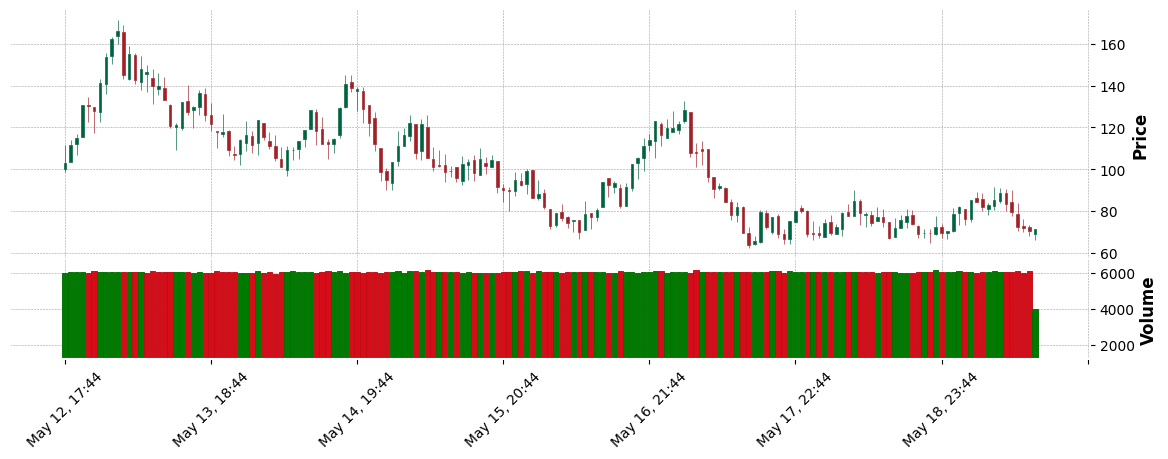

In [6]:
mplf.plot(tick_bars, type="candle", style="charles", figsize=(15,5), volume=True)

# Dollar Bars

In [7]:
data["dv"] = data["close"] * data["volume"]

In [8]:
mean_hourly_dv = np.mean(data.resample("H")["dv"].sum())
mean_hourly_dv

595220.794404762

In [9]:
dv_indices = create_bar_indices(data, mean_hourly_dv, "dv")
g = group_bars(data, dv_indices)
g = with_dv(g)
g = with_open(g)
g = with_close(g)
g = with_high(g)
g = with_low(g)
dv_bars = get_bars(g)
dv_bars.head()

,volume,dv,open,close,high,low
index,,,,,,
2022-05-12 17:44:59.573699,5681.0,598970.82,100.00,103.48,111.40,98.79
2022-05-12 18:41:59.573699,5514.0,595835.88,103.62,112.10,113.42,102.89
2022-05-12 19:36:59.573699,5424.0,600479.71,112.01,110.05,115.46,106.50
2022-05-12 20:30:59.573699,5016.0,601078.21,108.91,129.03,129.03,108.91
2022-05-12 21:20:59.573699,4686.0,603286.74,129.79,128.15,132.18,124.97


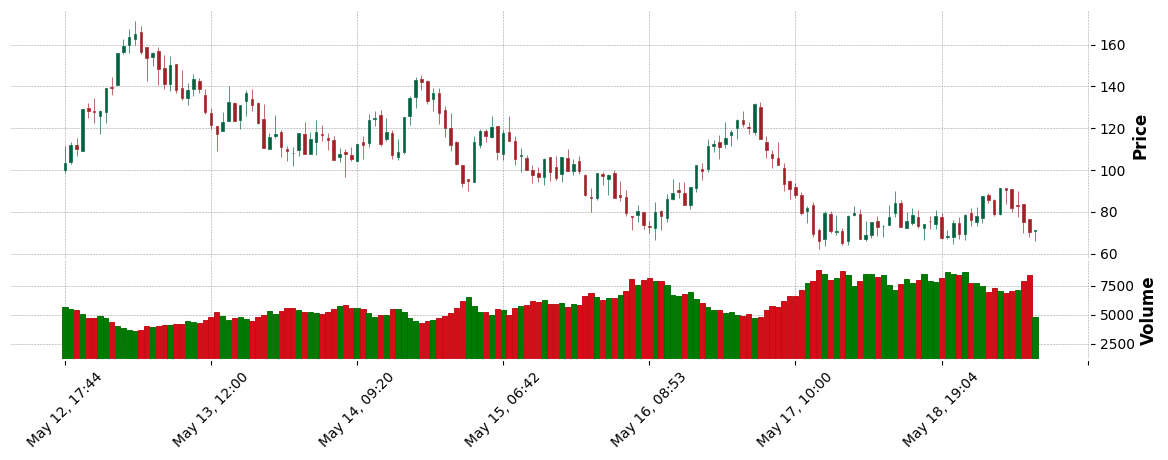

In [10]:
mplf.plot(dv_bars, type="candle", style="charles", figsize=(15,5), volume=True)

# Volume Bars

In [11]:
mean_hourly_volume = np.mean(data.resample("H")["volume"].sum())
mean_hourly_volume

5979.583333333333

In [12]:
volume_indices = create_bar_indices(data, mean_hourly_volume, "volume")
g = group_bars(data, volume_indices)
g = with_dv(g)
g = with_open(g)
g = with_close(g)
g = with_high(g)
g = with_low(g)
v_bars = get_bars(g)
v_bars.head()

,volume,dv,open,close,high,low
index,,,,,,
2022-05-12 17:44:59.573699,6079.0,640211.20,100.00,103.29,111.40,98.79
2022-05-12 18:45:59.573699,6000.0,654012.70,103.34,111.88,113.76,103.34
2022-05-12 19:45:59.573699,6048.0,672645.16,111.63,115.19,116.95,106.50
2022-05-12 20:45:59.573699,6021.0,750251.02,115.82,130.62,130.63,115.82
2022-05-12 21:45:59.573699,6066.0,778553.16,131.54,127.80,134.44,122.32


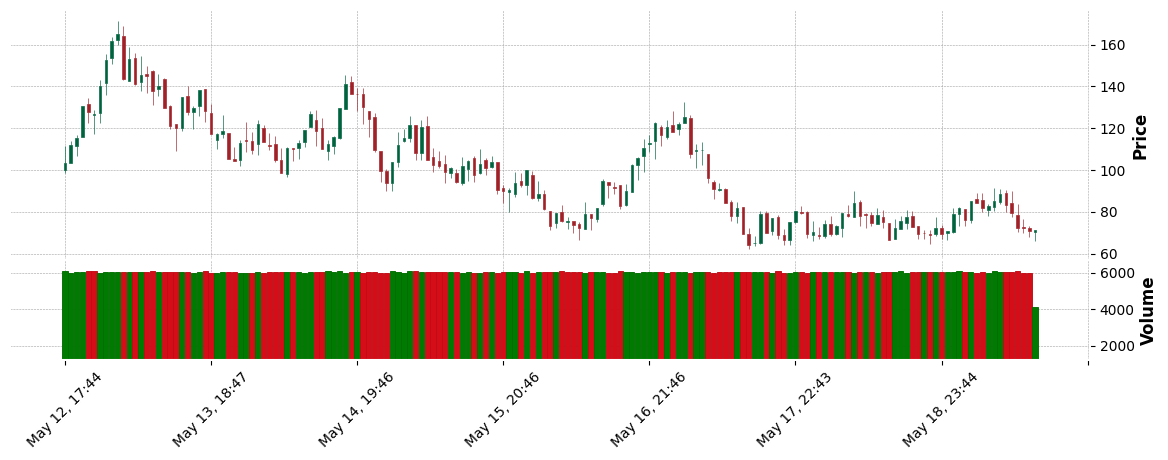

In [13]:
mplf.plot(v_bars, type="candle", style="charles", figsize=(15,5), volume=True)